In [326]:
import matplotlib.pyplot as plt
import numpy as np

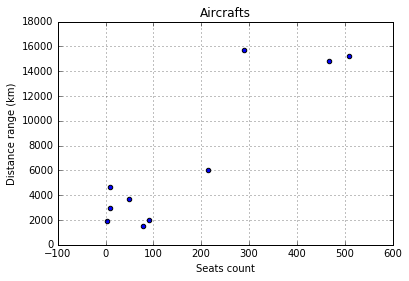

In [327]:
X=np.array([(4,1940),(9,2960),(9,4630),(78,1528),(90,2040),(50,3700),(467,14815),(509,15200),(290,15700),(215,6045)])

x1 = np.array(X[:,0])
x2 = np.array(X[:,1])

fig, ax = plt.subplots()
ax.scatter(x1,x2)
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts')
ax.grid()
plt.show()

In [328]:
train_data = np.array(X)
max_values = train_data.max(0)

X_norm = np.divide(train_data,max_values)

In [329]:
data_set=X_norm
groups = 2
space=[[0,1],[0,1]]

error_margin = 0.01
m = 2.0

assignation=np.random.rand(len(X),groups)
print(assignation)

[[0.98132027 0.67479959]
 [0.71435751 0.37867149]
 [0.33600067 0.86196979]
 [0.07066694 0.73627657]
 [0.85902284 0.24430299]
 [0.4490986  0.27108249]
 [0.69169694 0.70430986]
 [0.807759   0.896207  ]
 [0.46703096 0.32049338]
 [0.63047134 0.47309476]]


In [330]:
import random

centers = []

def select_centers():
    global centers
    global groups
    global space
    iter=0
    while iter<groups:
        centers.append((random.uniform(space[0][0],space[0][1]), 
                        random.uniform(space[1][0],space[1][1])))
        iter=iter+1
        
select_centers()

In [331]:
def calculate_new_centers(u):
    global centers
    new_centers=[]
    for c in range(groups):
        u_x_vector=np.zeros(2)
        u_scalar=0.0
        for i in range(len(data_set)):
            u_scalar = u_scalar+(u[i][c]**m)
            u_x_vector=np.add(u_x_vector,np.multiply(u[i][c]**m,data_set[i]))
        new_centers.append(np.divide(u_x_vector,u_scalar))
    centers=new_centers

In [332]:
def calculate_differences(new_assignation):
    global assignation    
    error = np.sum(np.abs(np.subtract(assignation,new_assignation)))
    return error

In [333]:
def cluster():
    global assignation    
    global error_margin    
    global groups
    difference_limit_not_achieved=True
    iter=0
    while difference_limit_not_achieved:
        new_assignation=[]
        for i in range(len(data_set)):
            new_assignation_vector=[]
            for k in range(groups):
                new_assignation_vector.append(calculate_u(data_set[i],k))
            new_assignation.append(new_assignation_vector)
        calculate_new_centers(new_assignation)

        if iter>0:
            if calculate_differences(new_assignation) < error_margin or iter > 10:
                difference_limit_not_achieved=False
        assignation=new_assignation
        iter=iter+1

In [334]:
import numpy as np
from scipy.spatial.distance import mahalanobis

def mahalanobis_distance(x, v, A=identity_matrix):
    x_v_diff = np.subtract(x, v)
    return np.sqrt(x_v_diff.dot(A).dot(x_v_diff))

def calculate_u(x,k):
    global centers
    sum1=(1+(mahalanobis_distance(x, centers[k])/calculate_eta(x, centers[k],k))**2)**-1
    return sum1

def calculate_eta(xx,yy,i):
    global assignation
    global data_set
    global groups
    return sum( assignation[i][k]**2*mahalanobis_distance(xx,yy)**2 for k in range(groups))/sum( assignation[i][k]**2 for k in range(groups))

In [335]:
cluster()

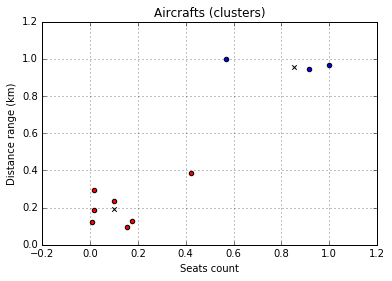

In [336]:
red = X_norm[np.where(np.array(assignation)[:,0]>np.array(assignation)[:,1])]
blue = X_norm[np.where(np.array(assignation)[:,0]<np.array(assignation)[:,1])]

fig, ax = plt.subplots()

ax.scatter(blue[:,0],blue[:,1],c='blue')
ax.scatter(red[:,0],red[:,1],c='red')
ax.scatter(np.array(centers)[:,0],np.array(centers)[:,1],marker='x',c='black')
ax.set(xlabel='Seats count', ylabel='Distance range (km)',
       title='Aircrafts (clusters)')
ax.grid()
plt.show()